In [15]:
from keras.datasets import fashion_mnist

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers
from keras import losses
from keras import metrics

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
num_classes = 10

train_data, test_data = np.array(train_data, np.float32), np.array(test_data, np.float32)

train_data, test_data = train_data / 255., test_data / 255.

train_data.shape

(60000, 28, 28)

In [7]:
model_first = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_first.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_first.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_first = model_first.fit(train_data, train_labels, epochs=50, batch_size=512, validation_data=(test_data, test_labels))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6017 - loss: 1.2330 - val_accuracy: 0.8144 - val_loss: 0.5431
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8290 - loss: 0.4958 - val_accuracy: 0.8344 - val_loss: 0.4669
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.4171 - val_accuracy: 0.8477 - val_loss: 0.4372
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3871 - val_accuracy: 0.8492 - val_loss: 0.4212
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3719 - val_accuracy: 0.8536 - val_loss: 0.4138
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3599 - val_accuracy: 0.8562 - val_loss: 0.3948
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.3385 - val_accuracy: 0.8509 - val_loss: 0.4141
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.3360 - val_accuracy: 0.

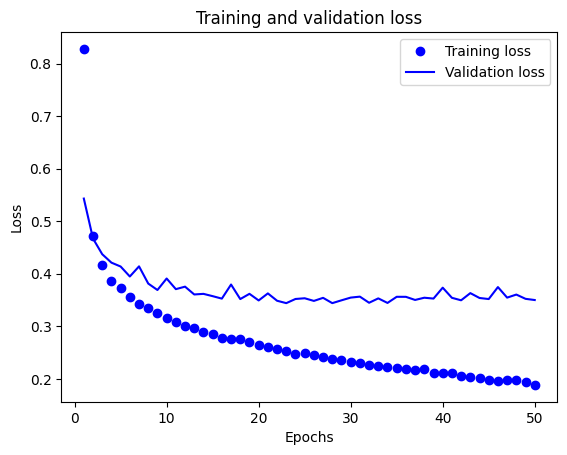

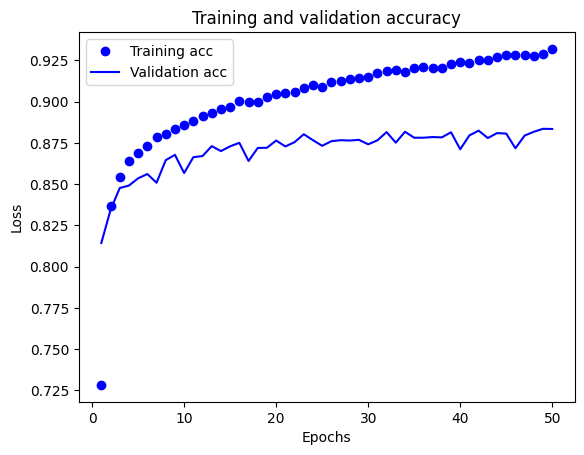

In [9]:
history_dict = history_first.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [13]:
test_loss, test_accuracy = model_first.evaluate(test_data, test_labels, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8848 - loss: 0.3455

Точність на тестовому наборі: 0.88


In [10]:
## Спробуємо додати кількість епох

In [11]:
model_second = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_second.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_second = model_second.fit(train_data, train_labels, epochs=75, batch_size=512, validation_data=(test_data, test_labels))

Epoch 1/75
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5882 - loss: 1.2015 - val_accuracy: 0.8126 - val_loss: 0.5436
Epoch 2/75
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.4990 - val_accuracy: 0.8324 - val_loss: 0.4774
Epoch 3/75
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 0.4303 - val_accuracy: 0.8456 - val_loss: 0.4394
Epoch 4/75
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.4029 - val_accuracy: 0.8452 - val_loss: 0.4321
Epoch 5/75
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3792 - val_accuracy: 0.8474 - val_loss: 0.4265
Epoch 6/75
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3648 - val_accuracy: 0.8574 - val_loss: 0.4020
Epoch 7/75
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.3479 - val_accuracy: 0.8627 - val_loss: 0.3807
Epoch 8/75
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.3356 - val_accuracy: 0.

In [12]:
test_loss, test_accuracy = model_second.evaluate(test_data, test_labels, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8828 - loss: 0.3863

Точність на тестовому наборі: 0.88


In [19]:
## Змінимо кількість шарів та підвищемо швидкість навчання

In [18]:
model_3 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_3.compile(
    optimizer=optimizers.Adam(learning_rate=0.002),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(train_data, train_labels, epochs=50, batch_size=512, validation_data=(test_data, test_labels))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5903 - loss: 1.1716 - val_accuracy: 0.8157 - val_loss: 0.5219
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8192 - loss: 0.5159 - val_accuracy: 0.8359 - val_loss: 0.4596
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8432 - loss: 0.4459 - val_accuracy: 0.8501 - val_loss: 0.4226
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.4117 - val_accuracy: 0.8595 - val_loss: 0.3958
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.3935 - val_accuracy: 0.8588 - val_loss: 0.3900
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3749 - val_accuracy: 0.8662 - val_loss: 0.3704
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3652 - val_accuracy: 0.8656 - val_loss: 0.3810
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8749 - loss: 0.3493 - val_accuracy: 0.

In [20]:
test_loss, test_accuracy = model_3.evaluate(test_data, test_labels, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8814 - loss: 0.3440

Точність на тестовому наборі: 0.88


In [21]:
model_4 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_4.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_4 = model_4.fit(train_data, train_labels, epochs=50, batch_size=512, validation_data=(test_data, test_labels))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6042 - loss: 1.1791 - val_accuracy: 0.7753 - val_loss: 0.6392
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.5398 - val_accuracy: 0.8237 - val_loss: 0.5059
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.4776 - val_accuracy: 0.8211 - val_loss: 0.5045
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8455 - loss: 0.4382 - val_accuracy: 0.8178 - val_loss: 0.5220
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 0.4242 - val_accuracy: 0.8122 - val_loss: 0.5181
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.4039 - val_accuracy: 0.8455 - val_loss: 0.4395
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3750 - val_accuracy: 0.8336 - val_loss: 0.4650
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3747 - val_accuracy: 0.

In [23]:
test_loss, test_accuracy = model_4.evaluate(test_data, test_labels, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8734 - loss: 0.3851

Точність на тестовому наборі: 0.87


In [ ]:
## Збільшимо кількість шарів та кількість нейронів

In [24]:
model_5 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_5.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_5 = model_5.fit(train_data, train_labels, epochs=50, batch_size=512, validation_data=(test_data, test_labels))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5439 - loss: 1.2587 - val_accuracy: 0.8200 - val_loss: 0.5291
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8188 - loss: 0.5240 - val_accuracy: 0.8343 - val_loss: 0.4705
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8432 - loss: 0.4496 - val_accuracy: 0.8510 - val_loss: 0.4167
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8499 - loss: 0.4151 - val_accuracy: 0.8574 - val_loss: 0.4042
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3816 - val_accuracy: 0.8669 - val_loss: 0.3791
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8706 - loss: 0.3611 - val_accuracy: 0.8637 - val_loss: 0.3804
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8743 - loss: 0.3505 - val_accuracy: 0.8681 - val_loss: 0.3759
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8781 - loss: 0.3313 - val_accuracy: 0.

In [25]:
test_loss, test_accuracy = model_5.evaluate(test_data, test_labels, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.8921 - loss: 0.4003

Точність на тестовому наборі: 0.89


In [26]:
## Модель 5 дала більше точності. Змінимо для неї butch_size

In [27]:
model_6 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_6.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_6 = model_6.fit(train_data, train_labels, epochs=50, batch_size=256, validation_data=(test_data, test_labels))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6404 - loss: 1.0481 - val_accuracy: 0.8311 - val_loss: 0.4695
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8345 - loss: 0.4702 - val_accuracy: 0.8467 - val_loss: 0.4243
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0.4023 - val_accuracy: 0.8603 - val_loss: 0.3900
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3747 - val_accuracy: 0.8554 - val_loss: 0.3920
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.3538 - val_accuracy: 0.8695 - val_loss: 0.3648
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.3217 - val_accuracy: 0.8708 - val_loss: 0.3567
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.3236 - val_accuracy: 0.8717 - val_loss: 0.3581
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8878 - loss: 0.3098 - val_accuracy: 0.

In [32]:
test_loss, test_accuracy = model_6.evaluate(test_data, test_labels, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8907 - loss: 0.4319

Точність на тестовому наборі: 0.89


In [29]:
## Додамо ще один шар

In [31]:
model_7 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_7.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_7 = model_7.fit(train_data, train_labels, epochs=50, batch_size=256, validation_data=(test_data, test_labels))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5774 - loss: 1.1826 - val_accuracy: 0.8249 - val_loss: 0.4816
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8282 - loss: 0.4877 - val_accuracy: 0.8460 - val_loss: 0.4238
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8473 - loss: 0.4240 - val_accuracy: 0.8586 - val_loss: 0.3916
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.3951 - val_accuracy: 0.8664 - val_loss: 0.3765
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8666 - loss: 0.3720 - val_accuracy: 0.8646 - val_loss: 0.3739
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8719 - loss: 0.3575 - val_accuracy: 0.8729 - val_loss: 0.3572
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.3471 - val_accuracy: 0.8737 - val_loss: 0.3534
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 0.3313 - val_accuracy: 0.

In [33]:
test_loss, test_accuracy = model_7.evaluate(test_data, test_labels, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.8925 - loss: 0.3226

Точність на тестовому наборі: 0.89
